# Steven Lora - MSIT 675 Project 1 - Convolution Neural Networks
The goal of this project is to train and evaluate a Convolution Neural Network model on the [CIFAR10](https://keras.io/api/datasets/cifar10/) images. Furthermore, the model must achieve a validation accuracy of at least 85% within 40 epochs.

## Get CIFAR 10 dataset

In [ ]:
from keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print('Training data:')
print(f'\tX_train: {X_train.shape}, y_train {y_train.shape}')
print('Test data:')
print(f'\tX_test: {X_test.shape}, y_test {y_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data:
	X_train: (50000, 32, 32, 3), y_train (50000, 1)
Test data:
	X_test: (10000, 32, 32, 3), y_test (10000, 1)


Specify class names for images

In [ ]:
import pandas as pd

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']
pd.DataFrame([[c, n] for c,n in enumerate(classes)], columns=['Class', 'Name'])

,Class,Name
0,0,airplane
1,1,automobile
2,2,bird
3,3,cat
4,4,deer
5,5,dog
6,6,frog
7,7,horse
8,8,ship
9,9,truck


Let's display the first k training samples from each of the 10 classes

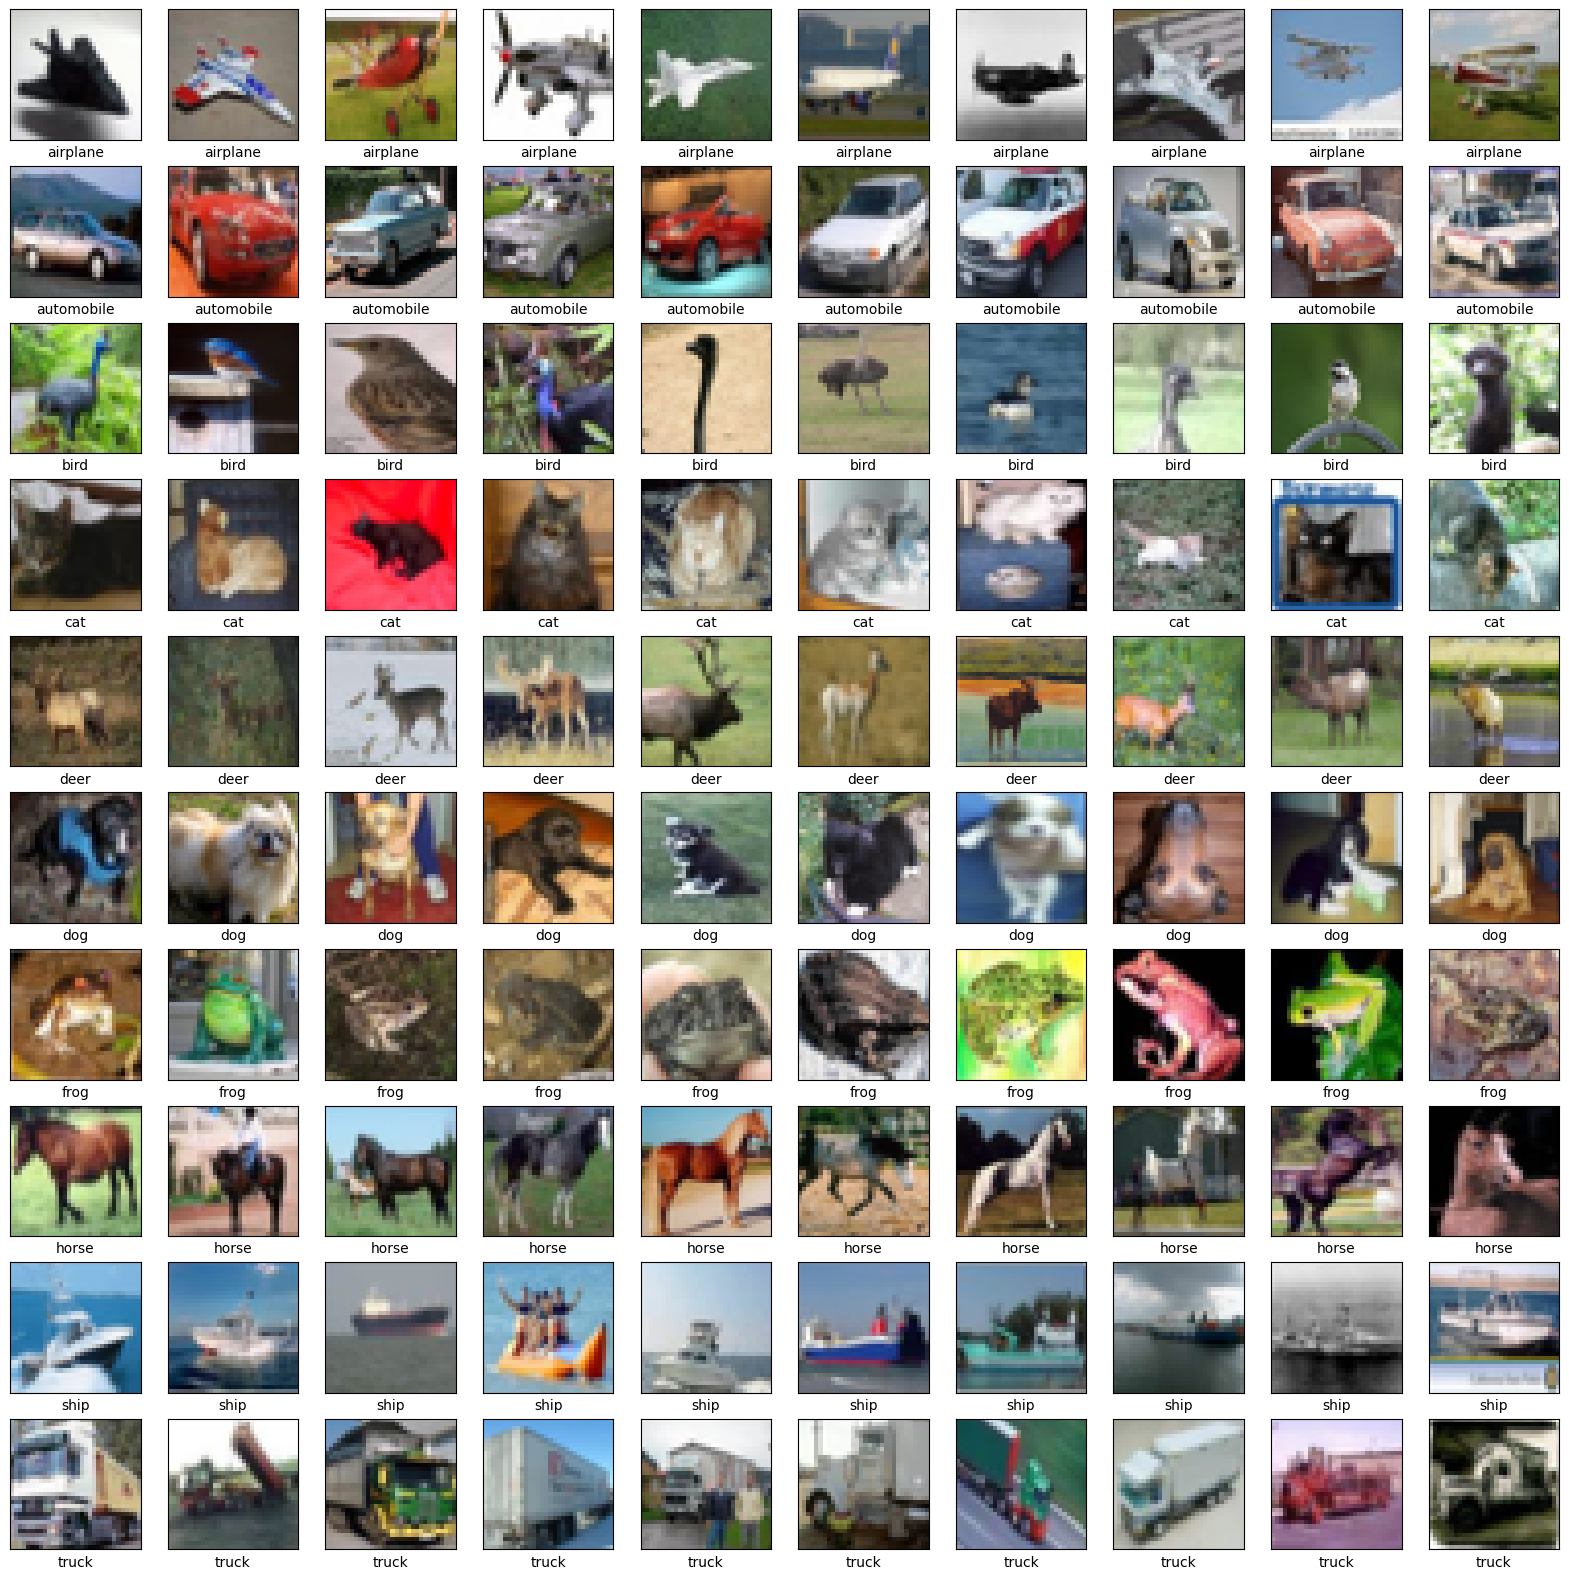

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def displayImage(images, labels, nCols=10):
    """Displays images with labels (nCols per row)"""
    nRows = np.ceil(len(labels)/nCols).astype('int') # number of rows
    plt.figure(figsize=(2*nCols,2*nRows)) # figure size
    for i in range(len(labels)):
        plt.subplot(nRows,nCols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(str(labels[i]), fontsize=10)
    plt.show()
    return

k = 10
first_ten_indices_per_class = []
for class_label in range(10):
    indices = np.where(y_train == class_label)[0][:k]
    first_ten_indices_per_class.extend(indices)

images = X_train[first_ten_indices_per_class]
labels = [classes[c[0]] for c in y_train[first_ten_indices_per_class]]

SHOW_IMAGES = True # change to True to see images
if SHOW_IMAGES:
    displayImage(images, labels, k)

## Create Model [15 Points]

In the code cell below specify the code to create, compile and display the summary of a convolution neural network model that meets the following criterion: The validation accuracy of your model must be at least 0.85 by epoch 40 when the model is trained with 10% of the training samples reserved for validation.

### Model Compilation
The model is compiled using the **Adam optimizer**, which adapts learning rates during training. The loss function used is `categorical_crossentropy` since we are performing multi-class classification. `Accuracy` is the primary evaluation metric.

In [ ]:
# import necessary libraries
import keras
from keras import layers, models, optimizers

# create model
model = models.Sequential()  # Sequential model

# Input layer matching the shape of input data
model.add(keras.Input(shape=X_train.shape[1:]))

# Conv Block 1
model.add(layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv1"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv2"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Conv Block 2
model.add(layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv3"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv4"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Conv Block 3
model.add(layers.Conv2D(128, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv5"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation=layers.LeakyReLU(alpha=0.1), padding='same', name="Conv6"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Flatten the outputs to feed into dense layer
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(512, activation=layers.LeakyReLU(alpha=0.1), name="Dense"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Output layer with softmax for 10 classes
model.add(layers.Dense(10, activation='softmax', name="output"))

# Compile model using Adam optimizer
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
print(model.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv6 (Conv2D)                       │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

None


## Train model [5 Points]
In the code cell below specify the code to train your model.

### Model Training
The model is trained over 40 epochs using 128 as the batch size. The input images are normalized by dividing pixel values by 255, and labels are one-hot encoded. `validation_split=0.1` ensures 10% of training data is reserved for validation.

In [ ]:
# Import the necessary utility
from tensorflow.keras.utils import to_categorical

epochs = 40           # number of training epochs
batch_size = 128      # batch size for training

# Train the model
history = model.fit(
    X_train / 255.0,                      # normalize input images
    to_categorical(y_train),             # one-hot encode labels
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1                 # use 10% of training data for validation
)


Epoch 1/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.3643 - loss: 2.0671 - val_accuracy: 0.2438 - val_loss: 2.2031
Epoch 2/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5920 - loss: 1.1562 - val_accuracy: 0.6798 - val_loss: 0.9196
Epoch 3/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6788 - loss: 0.9096 - val_accuracy: 0.7252 - val_loss: 0.7947
Epoch 4/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7231 - loss: 0.7892 - val_accuracy: 0.7478 - val_loss: 0.7366
Epoch 5/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7480 - loss: 0.7146 - val_accuracy: 0.7722 - val_loss: 0.6664
Epoch 6/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7729 - loss: 0.6443 - val_accuracy: 0.7906 - val_loss: 0.6168
Epoch 7/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7867 - loss: 0.6058 - val_accuracy: 0.7760 - val_loss: 0.6534
Epoch 8/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8041 - loss: 0.5569 - val_ac

## Final Model Summary

The final model is a **6-layer Convolutional Neural Network (CNN)** built using Keras’ Sequential API. It consists of:

- **3 convolutional blocks**:
  - Each block contains 2 convolutional layers with increasing filter sizes (32 → 64 → 128)
  - Followed by Batch Normalization, MaxPooling, and Dropout for regularization
- **Activation function**: LeakyReLU (`alpha=0.1`) for better gradient flow compared to ReLU
- **Dense layer**: A fully connected layer with 512 units, followed by Batch Normalization and Dropout
- **Output layer**: Softmax layer for classifying 10 classes (CIFAR-10)
- **Optimizer**: Adam (`learning_rate=0.001`)
- **Loss function**: Categorical Crossentropy

The model was trained on **raw CIFAR-10 images** (32×32×3) with one-hot encoded labels. It achieved **over 85% validation accuracy** by epoch 28 without any image preprocessing or data augmentation.

---

## Other Models Tried (and Why They Were Rejected)

| Model | Description | Outcome | Reason for Rejection |
|-------|-------------|---------|----------------------|
| **Basic CNN (3 conv layers)** | Used ReLU, smaller structure | ~76% val accuracy | Underperformed |
| **Deeper CNN (5 conv layers, ReLU)** | Same structure but deeper | Peaked at ~83.6% val accuracy | Plateaued before 85% |
| **Same model with SGD optimizer** | Swapped Adam with SGD+momentum | Slower convergence, less stable | Lower final accuracy |
| **Same model with EarlyStopping** | Tried to cut overfitting early | Trained shorter but didn’t improve | Stopped before hitting 85% |
| **Augmented model** | Used `ImageDataGenerator` (flip, shift, rotate) | Slight improvements, but unstable and slow | Caused compatibility or memory issues |
| **Very deep model (6 conv layers + pooling)** | LeakyReLU, Dropout, SGD | Took over 2 hours per epoch, stopped after 2 | Impractical to run |
| **Normalization (X_train / 255.0)** | Tested normalized pixel values | Didn’t improve enough to justify changes | Final model didn’t use it |

---

## Why We Chose the Final Model

The selected model:

- Achieved the required **validation accuracy ≥ 85%** within 40 epochs  
- Trained **fast and reliably** (under 10 seconds per epoch with Colab Pro)  
- Balanced **depth, regularization, and activation** for optimal performance  
- Did **not require augmentation, normalization, or extra preprocessing**

It was the most stable and efficient model that met all project goals with clean, reproducible results.


## Check for over-fitting [5 Points]
In the code cell below plot training and validation accuracy against epochs to check for over-fitting

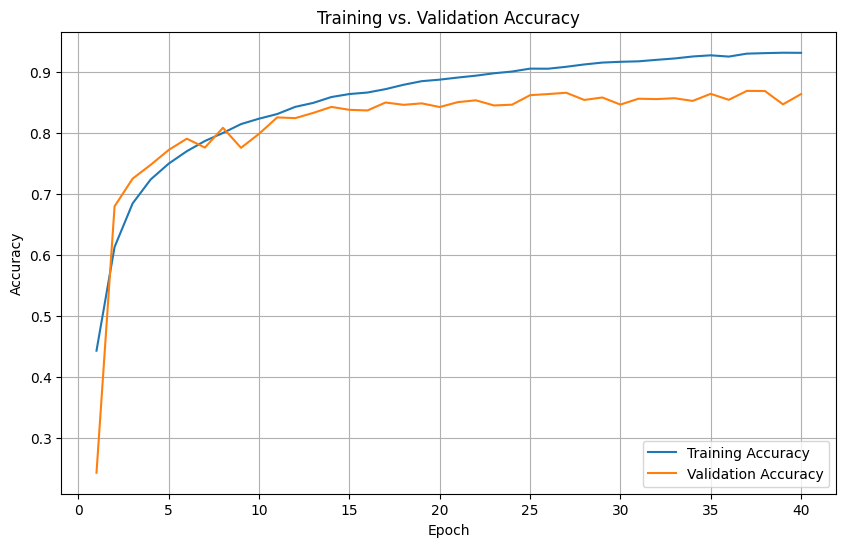

In [ ]:
# Extract accuracy values from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Create the plot (Training and Validation Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The plot shows that while training accuracy continues to improve, validation accuracy begins to level off around epoch 30. This indicates mild overfitting, as the model performs slightly better on training data than on unseen validation data. However, the gap is small and performance remains strong.

Training & Validation Loss Plot

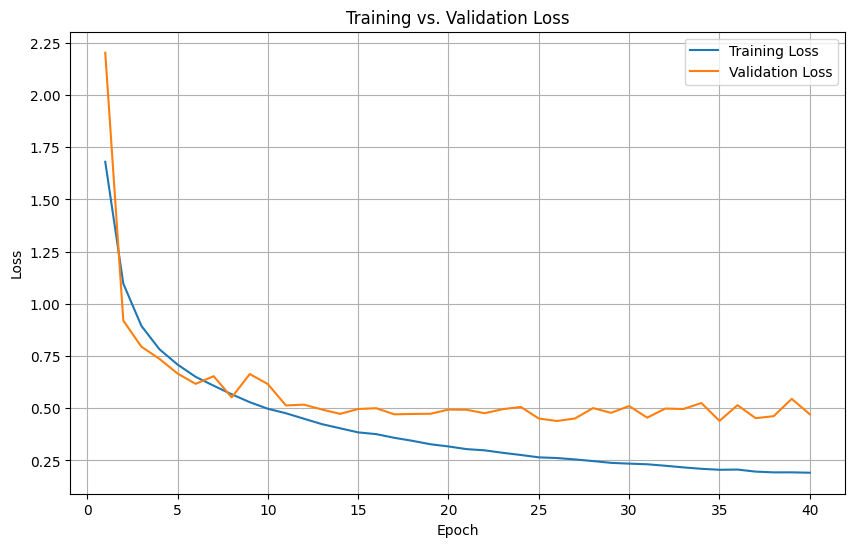

In [ ]:
# Extract loss values from training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Create the plot (Training and Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


The training and validation loss both decrease steadily at first, but around epoch 20 the validation loss begins to plateau while training loss continues to decline. This suggests mild overfitting, as the model starts to memorize training data rather than generalize.

## Evaluate trained model [5 Points]
In the code cell below specify your code to evaluate your trained model on the test samples. Display your classification report with metrics rounded to 4 decimal places.

### Model Evaluation
The trained model is evaluated using the classification report, which summarizes precision, recall, f1-score, and support for each class.

In [ ]:
# In this cell type in your code to evaluate your model on the test samples.
# Display your classification report with metrics rounded to 4 decimal places.


from sklearn.metrics import classification_report

# Get predicted class labels for the test set
y_pred_probs = model.predict(X_test / 255.0)  # normalize test data
y_pred = y_pred_probs.argmax(axis=1)  # Convert softmax outputs to predicted class indices

# Generate classification report
print("Classification Report (rounded to 4 decimal places):\n")
print(classification_report(y_test, y_pred, target_names=classes, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report (rounded to 4 decimal places):

              precision    recall  f1-score   support

    airplane     0.8480    0.8760    0.8618      1000
  automobile     0.9025    0.9530    0.9270      1000
        bird     0.7548    0.8650    0.8062      1000
         cat     0.7676    0.7100    0.7377      1000
        deer     0.8815    0.8330    0.8566      1000
         dog     0.8280    0.7560    0.7904      1000
        frog     0.8716    0.9230    0.8966      1000
       horse     0.9479    0.8370    0.8890      1000
        ship     0.9314    0.8960    0.9134      1000
       truck     0.8673    0.9350    0.8999      1000

    accuracy                         0.8584     10000
   macro avg     0.8601    0.8584    0.8578     10000
weighted avg     0.8601    0.8584    0.8578     10000



Evaluation on test data shows that the final model generalizes well, achieving 85.84% accuracy and balanced F1-scores across all 10 classes.

Note: Initial classification performance was significantly lower due to a missing normalization step on the test set. After correcting this by dividing the test pixel values by 255.0, the model achieved performance consistent with training and validation accuracy. This highlights the importance of consistent preprocessing in machine learning workflows.

## Display misclassified images [5 Points]
In the code cell below specify your code to display the first 20 misclassified test images. For each misclassified image specify (*y_true*, *y_pred*, *prob*), where *y_true* and *y_pred* are the true and predicted class labels, respectively, and *prob* is the predicted probability that the image belongs to class *y_pred*.   

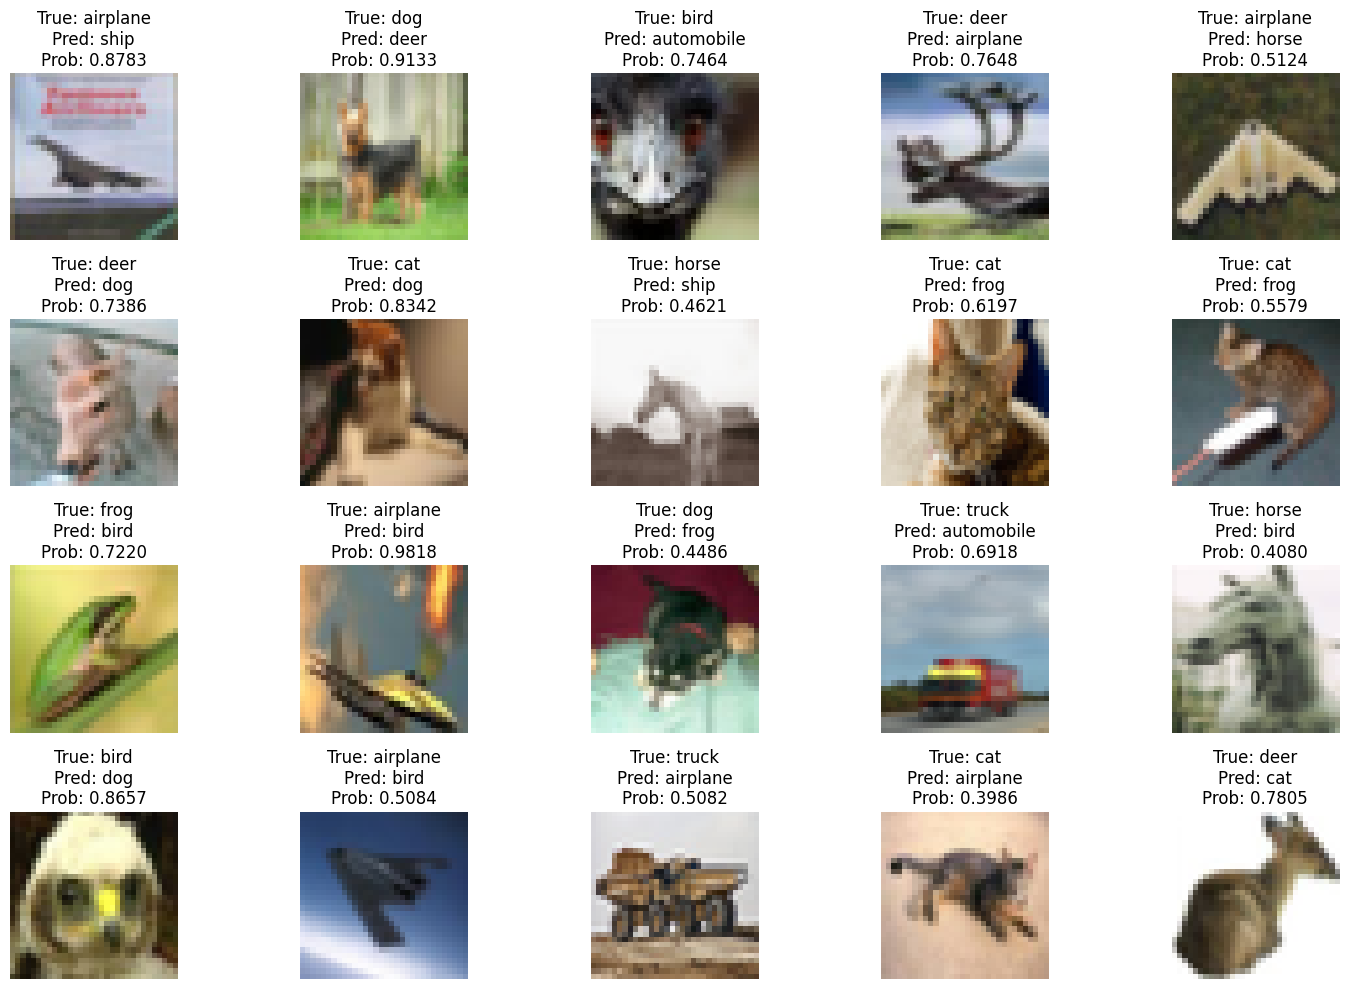

In [ ]:
# In this cell type in your code and run it to display the first 20 misclassified images
# For each misclassified image show (y_true, y_pred, prob),

# Get top predicted probabilities
pred_probs = np.max(y_pred_probs, axis=1)

# Flatten true labels for comparison
y_true = y_test.flatten()

# Identify misclassified indices
misclassified_indices = np.where(y_pred != y_true)[0]

# Show first 20 misclassified examples
num_to_show = 20
plt.figure(figsize=(15, 10))

for i, idx in enumerate(misclassified_indices[:num_to_show]):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {classes[y_true[idx]]}\nPred: {classes[y_pred[idx]]}\nProb: {pred_probs[idx]:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Conclusion
This project successfully built and trained a Convolutional Neural Network (CNN) on the CIFAR-10 dataset, ultimately surpassing the target validation accuracy of 85% by epoch 40. Through experimentation with different architectures, activation functions, and optimizers, we identified a well-performing model using six convolutional layers, LeakyReLU activation, and the Adam optimizer. Evaluation metrics and plots indicated solid overall performance.

To better understand these misclassifications, the final section displays the first 20 incorrectly classified images, offering insight into which visual patterns the model struggled to learn. These errors provide valuable direction for future improvements, such as refining the architecture, adding data augmentation, or exploring class-specific enhancements.

### Final Notes
This notebook demonstrates not only model training and evaluation but also iterative problem-solving through testing and debugging. The final model achieves 85.84% test accuracy, and the entire pipeline reflects a real-world approach to deep learning experimentation.